In [15]:
import pandas as pd
import numpy as np
from typing import List
import seaborn as sn
import matplotlib.pyplot as plt
from tqdm import tqdm

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

In [ ]:
df = pd.read_csv("../data/interim/user_track_df.csv", index_col=[0])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 590 entries, user_000001 to user_001000
Columns: 178423 entries, ! Www.Polskie-Mp3.Tk ! Jacek Kaczmarski, Gintrowski And Lapinski_05. Astrolog to Ｄｊ　Ｋａｗａｓａｋｉ_Ｌｉｋｅ　Ｔｈｕｎｄｅｒ
dtypes: int64(178423)
memory usage: 803.1+ MB


In [10]:
# Standardize the feature matrix
X = StandardScaler().fit_transform(df)

# Make sparse matrix
X_sparse = csr_matrix(X)

# Create a TSVD
tsvd = TruncatedSVD(n_components=100, random_state=42)

# Conduct TSVD on sparse matrix
X_sparse_tsvd = tsvd.fit(X_sparse).transform(X_sparse)

# 2D Scatter

In [13]:
# Create a TSVD
tsvd_2d = TruncatedSVD(n_components=2, random_state=42)

# Conduct TSVD on sparse matrix
X_sparse_tsvd_2d = tsvd_2d.fit(X_sparse).transform(X_sparse)

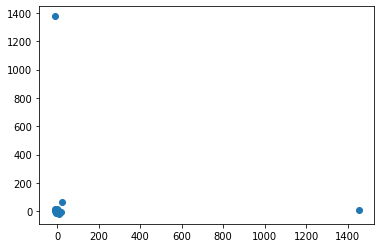

In [17]:
plt.scatter(X_sparse_tsvd_2d[:, 0], X_sparse_tsvd_2d[:, 1])

There are two obvious outliers. We can remove them and plot the scatter again.

In [86]:
filterd_scatter = np.delete(X_sparse_tsvd_2d, np.where(X_sparse_tsvd_2d>200)[0], axis=0)

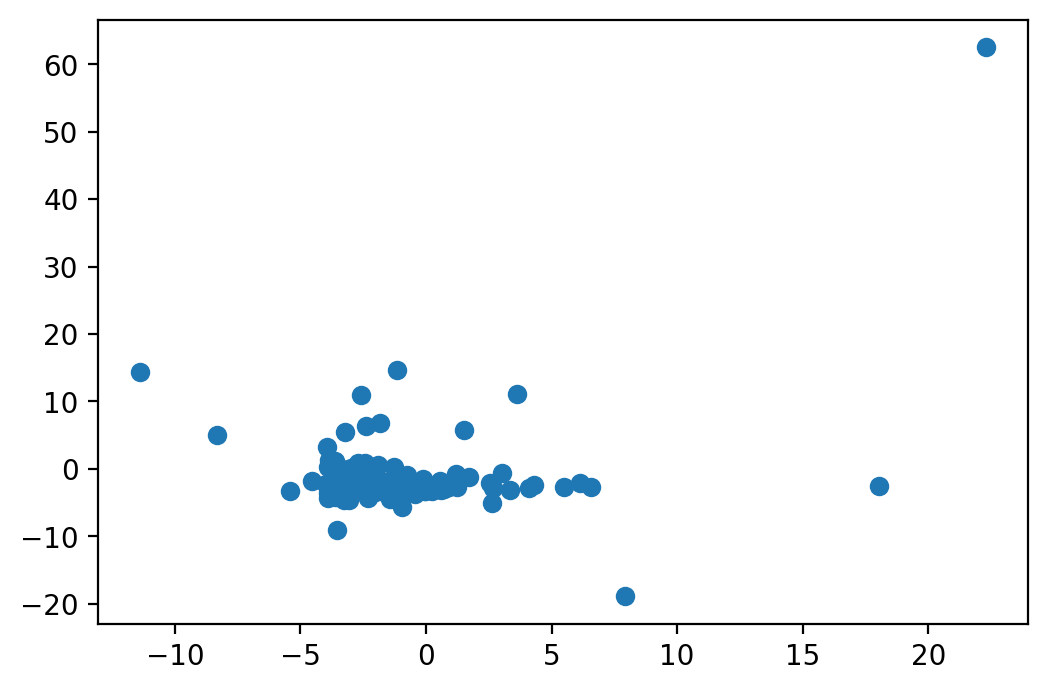

In [88]:
fig, ax = plt.subplots(dpi=200)
plt.scatter(filterd_scatter[:, 0], filterd_scatter[:, 1])
plt.show()

As we can see from the graph. There are no remarkable clusters.